In [2]:
# Credit Card Fraud – Data Quality & Bias Analysis
#COMP/STAT 331 – Pyodide-compatible notebook

#This notebook performs basic data quality analysis on the Kaggle **Credit Card Fraud** dataset.- Loads `creditcard.csv`
#- Checks completeness and missingness
# Examines class imbalance
#- Creates and saves charts and summary files into a `results/` folder.

> **Note:** This version only uses `pandas`, `numpy`, and `matplotlib`, so it works on Jupyter.org (Pyodide).

In [3]:

#--------------------------------------------------
#Imports_and_paths
#--------------------------------------------------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


DATA_PATH = "../data/creditcard.csv"
RESULTS_DIR = "../results"

os.makedirs(RESULTS_DIR, exist_ok=True)

print("Data path:", DATA_PATH)
print("Results directory:", RESULTS_DIR)


Data path: ../data/creditcard.csv
Results directory: ../results


## 2. Load Dataset and Basic Overview

In [4]:

#--------------------------------------------------
#Loaddataset
#--------------------------------------------------
df = pd.read_csv(DATA_PATH)

print("Shape (rows, columns):", df.shape)
print("\nColumns:\n", df.columns.tolist())

print("\nInfo:")
print(df.info())

print("\nFirst 5 rows:")
display(df.head())

print("\nBasic statistics (first 10 rows of describe):")
display(df.describe().T.head(10))


Shape (rows, columns): (249556, 31)

Columns:
 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249556 entries, 0 to 249555
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    249556 non-null  float64
 1   V1      249556 non-null  float64
 2   V2      249556 non-null  float64
 3   V3      249556 non-null  float64
 4   V4      249556 non-null  float64
 5   V5      249556 non-null  float64
 6   V6      249556 non-null  float64
 7   V7      249556 non-null  float64
 8   V8      249556 non-null  float64
 9   V9      249556 non-null  float64
 10  V10     249556 non-null  float64
 11  V11     249556 non-null  float64
 12  V12     249556 non-null  float64
 13  V13     249556 non-null  float64
 14  V14    

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0



Basic statistics (first 10 rows of describe):


,count,mean,std,min,25%,50%,75%,max
Time,249556.0,85202.024131,42704.597318,0.000000,50249.000000,77419.500000,127418.000000,154462.000000
V1,249556.0,-0.037792,1.960424,-56.407510,-0.936476,-0.004920,1.264234,2.454930
V2,249556.0,-0.020189,1.670365,-72.715728,-0.608861,0.060331,0.780993,22.057729
V3,249556.0,0.102598,1.507248,-33.680984,-0.714127,0.295455,1.102803,9.382558
V4,249556.0,0.024774,1.415129,-5.683171,-0.837250,0.014235,0.795004,16.875344
V5,249556.0,-0.037964,1.376288,-42.147898,-0.728237,-0.095745,0.565857,34.801666
V6,249556.0,0.018971,1.326704,-26.160506,-0.747768,-0.250158,0.422239,22.529298
V7,249556.0,-0.016577,1.227456,-43.557242,-0.565266,0.020682,0.546927,36.877368
V8,249556.0,0.002013,1.195251,-73.216718,-0.201545,0.029110,0.330641,20.007208
V9,249556.0,0.001185,1.112322,-13.434066,-0.655010,-0.058565,0.608082,15.594995


## 3. Missingness / Completeness

Here we check for missing values in each column and create a simple heatmap image.

Missingness summary (top 10 rows):


,missing_count,missing_percent
Class,1,0.0004
Amount,1,0.0004
V28,1,0.0004
V27,1,0.0004
V26,1,0.0004
V16,0,0.0000
V25,0,0.0000
V24,0,0.0000
V23,0,0.0000
V22,0,0.0000


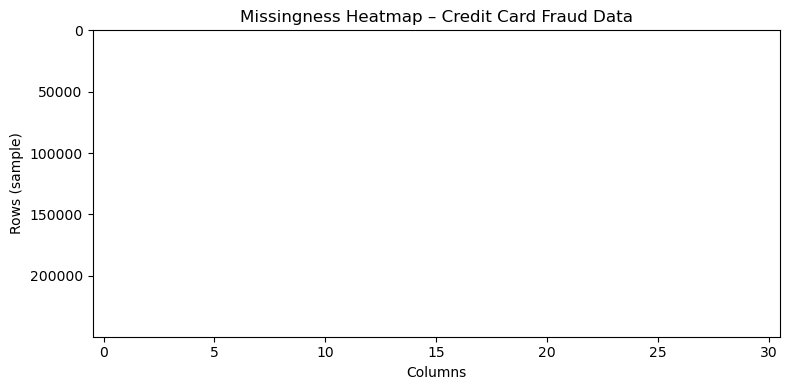

In [5]:

#--------------------------------------------------
#3_Missingness/completeness
#--------------------------------------------------
missing_counts = df.isna().sum()
missing_pct = (missing_counts / len(df)) * 100

missing_table = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_percent": missing_pct.round(4)
}).sort_values("missing_percent", ascending=False)

print("Missingness summary (top 10 rows):")
display(missing_table.head(10))

# Save_full_missingness_table
missing_table.to_csv(os.path.join(RESULTS_DIR, "missingness_summary.csv"))

# Missingness_heatmap_using_matplotlib_only
plt.figure(figsize=(8, 4))
plt.imshow(df.isna(), aspect="auto", cmap="gray_r")
plt.title("Missingness Heatmap – Credit Card Fraud Data")
plt.xlabel("Columns")
plt.ylabel("Rows (sample)")
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "missingness_heatmap.png"), dpi=300)
plt.show()


## 4. Class Imbalance – Fraud vs Legitimate

We examine how many transactions are fraudulent (Class = 1) vs legitimate (Class = 0).

Class counts:
Class
0.0    249100
1.0       455
Name: count, dtype: int64

Class percentages:
Class
0.0    99.8177
1.0     0.1823
Name: proportion, dtype: float64


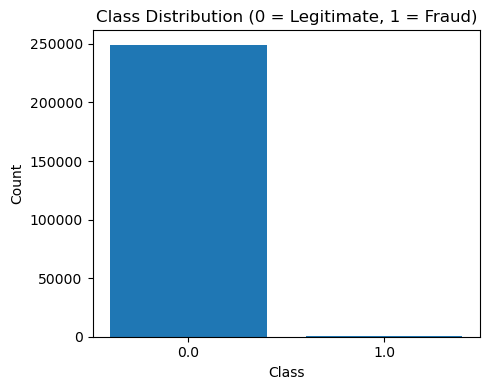

In [6]:

# --------------------------------------------------
#4_Class_distribution_fraud_vs_legitimate)
# --------------------------------------------------
class_counts = df["Class"].value_counts()
class_pct = df["Class"].value_counts(normalize=True) * 100

print("Class counts:")
print(class_counts)
print("\nClass percentages:")
print(class_pct.round(4))

# Save_numeric_summary
class_dist_df = pd.DataFrame({
    "Class": class_counts.index,
    "Count": class_counts.values,
    "Percent": class_pct.values
})
class_dist_df.to_csv(os.path.join(RESULTS_DIR, "class_distribution.csv"), index=False)

# Bar_chart_using_matplotlib_only
plt.figure(figsize=(5, 4))
plt.bar(class_counts.index.astype(str), class_counts.values)
plt.title("Class Distribution (0 = Legitimate, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "class_distribution.png"), dpi=300)
plt.show()


## 5. Amount Distribution by Class

We look at transaction amounts for fraud vs non-fraud using a log transform to reduce skew.

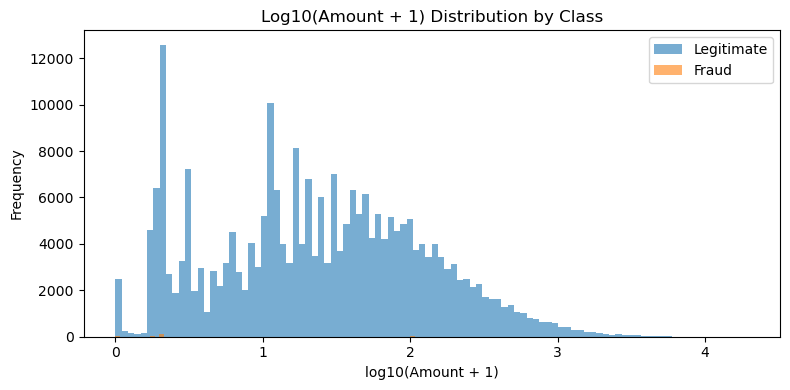

In [7]:

#--------------------------------------------------
# Amount_distribution_by_class
#--------------------------------------------------
# Log10_transform_to_reduce_skew
df["log_amount"] = np.log10(df["Amount"] + 1)

plt.figure(figsize=(8, 4))
plt.hist(df[df["Class"] == 0]["log_amount"], bins=100, alpha=0.6, label="Legitimate")
plt.hist(df[df["Class"] == 1]["log_amount"], bins=100, alpha=0.6, label="Fraud")
plt.title("Log10(Amount + 1) Distribution by Class")
plt.xlabel("log10(Amount + 1)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "amount_distribution_by_class.png"), dpi=300)
plt.show()


## 6. Transactions Over Time by Class

The `Time` column represents seconds from the first recorded transaction. We view how transactions (and frauds) are distributed over the 2-day window.

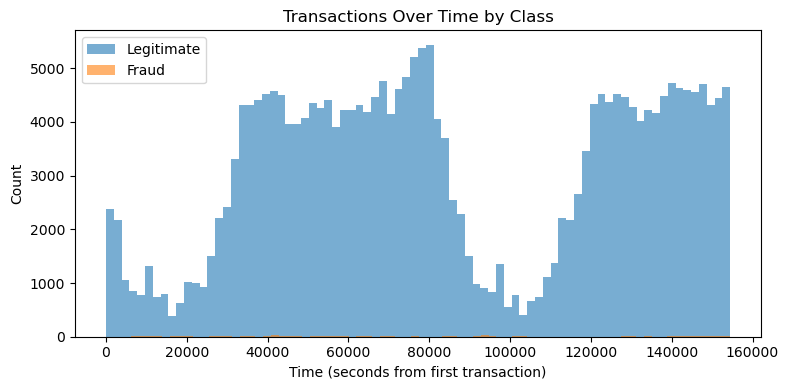

In [8]:

#--------------------------------------------------
#Fraud_over_time_simple_time_vs_class_view
#--------------------------------------------------
plt.figure(figsize=(8, 4))
plt.hist(df[df["Class"] == 0]["Time"], bins=80, alpha=0.6, label="Legitimate")
plt.hist(df[df["Class"] == 1]["Time"], bins=80, alpha=0.6, label="Fraud")
plt.title("Transactions Over Time by Class")
plt.xlabel("Time (seconds from first transaction)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "transactions_over_time_by_class.png"), dpi=300)
plt.show()


## 7. Duplicate Records (Uniqueness)

We check for exact duplicate rows to assess the **uniqueness** dimension of data quality.

In [9]:

#--------------------------------------------------
#Duplicate_records_uniqueness
#--------------------------------------------------
total_dupes = df.duplicated().sum()
print("Total exact duplicate rows:", total_dupes)

dup_mask = df.duplicated()
dup_by_class = df.loc[dup_mask, "Class"].value_counts()
print("\nDuplicate rows by class:")
print(dup_by_class)

dup_summary = pd.DataFrame({
    "Class": dup_by_class.index,
    "Duplicate_Count": dup_by_class.values
})
dup_summary.to_csv(os.path.join(RESULTS_DIR, "duplicate_summary.csv"), index=False)
display(dup_summary)


Total exact duplicate rows: 919

Duplicate rows by class:
Class
0.0    900
1.0     19
Name: count, dtype: int64


,Class,Duplicate_Count
0,0.0,900
1,1.0,19


## 8. Summary Notes for Report

Finally, we save a short Markdown summary to the `results/` folder that you can reuse in your report.

In [10]:

#--------------------------------------------------
#Quick_summary_notes_for_the_report
#--------------------------------------------------
fraud_rate = class_pct.get(1, 0.0)

summary_path = os.path.join(RESULTS_DIR, "summary_notes.md")
with open(summary_path, "w") as f:
    f.write("# Credit Card Fraud – Data Quality Summary\n\n")
    f.write(f"- Rows: {df.shape[0]}, Columns: {df.shape[1]}\n")
    f.write(f"- Fraud rate: {fraud_rate:.4f}% of all transactions\n")
    f.write("- Missingness: see `missingness_summary.csv` (should be all zeros).\n")
    f.write(f"- Exact duplicate rows: {total_dupes}\n")
    f.write("- Class imbalance is extreme (over 99% legitimate).\n")
    f.write("- Dataset covers only a short time window (about 2 days) and one region (European cardholders).\n")

print("Summary notes saved to:", summary_path)
print("\nAnalysis complete. Charts and tables are saved in:", RESULTS_DIR)


Summary notes saved to: ../results/summary_notes.md

Analysis complete. Charts and tables are saved in: ../results
